In [1]:
from pyquil.quil import Program
import pyquil.api as api
from pyquil.gates import *
qvm=api.QVMConnection()

In [18]:
def small_ansatz(params):
    return Program(X(0),X(1),H(0),H(1),H(2),RX(-0.5,3),CNOT(0,1),CNOT(1,2),
                   CNOT(2,3),RZ(params[0],3),CNOT(2,3),CNOT(1,2),CNOT(0,1)
                  ,H(2),H(1),H(0),RX(0.5,3))
print(small_ansatz([0.01]))

X 0
X 1
H 0
H 1
H 2
RX(-0.5) 3
CNOT 0 1
CNOT 1 2
CNOT 2 3
RZ(0.01) 3
CNOT 2 3
CNOT 1 2
CNOT 0 1
H 2
H 1
H 0
RX(0.5) 3



In [19]:
wf = qvm.wavefunction(small_ansatz([0.01]))
print(wf)

(0.9999875+0j)|0011> + -0.0043878945j|0100> + (-0.0023971177+0j)|1100>


In [20]:
from openfermion.ops import QubitOperator
from openfermion.transforms import get_fermion_operator, jordan_wigner, bravyi_kitaev
from pyscf import ci
from pyscf import mp
from openfermionpyscf import run_pyscf
from openfermion.hamiltonians import MolecularData

In [72]:
#menentukan molekul yang akan ditinjau
geometry = [["H", [0, 0, 0]],
            ["H", [0, 0, 0.74]]]
basis = "sto-3g"
multiplicity = 1
charge = 0
molecule = MolecularData(geometry, basis, multiplicity, charge)
h2_molecule = run_pyscf(molecule, run_mp2=True, run_cisd=True, run_ccsd=True, run_fci=True)

In [73]:
import openfermionpyscf as ofpyscf
hamiltonian2 = ofpyscf.generate_molecular_hamiltonian(
    geometry, basis, multiplicity, charge)

In [74]:
print(h2_molecule.get_molecular_hamiltonian())

() 0.7151043390810812
((0, 1), (0, 0)) -1.2533097866459773
((1, 1), (1, 0)) -1.2533097866459773
((2, 1), (2, 0)) -0.4750688487721757
((3, 1), (3, 0)) -0.4750688487721757
((0, 1), (0, 1), (0, 0), (0, 0)) 0.33737796340722415
((0, 1), (0, 1), (2, 0), (2, 0)) 0.09060523100759851
((0, 1), (1, 1), (1, 0), (0, 0)) 0.33737796340722415
((0, 1), (1, 1), (3, 0), (2, 0)) 0.09060523100759851
((0, 1), (2, 1), (0, 0), (2, 0)) 0.09060523100759851
((0, 1), (2, 1), (2, 0), (0, 0)) 0.3318557006754069
((0, 1), (3, 1), (1, 0), (2, 0)) 0.09060523100759851
((0, 1), (3, 1), (3, 0), (0, 0)) 0.3318557006754069
((1, 1), (0, 1), (0, 0), (1, 0)) 0.33737796340722415
((1, 1), (0, 1), (2, 0), (3, 0)) 0.09060523100759851
((1, 1), (1, 1), (1, 0), (1, 0)) 0.33737796340722415
((1, 1), (1, 1), (3, 0), (3, 0)) 0.09060523100759851
((1, 1), (2, 1), (0, 0), (3, 0)) 0.09060523100759851
((1, 1), (2, 1), (2, 0), (1, 0)) 0.3318557006754069
((1, 1), (3, 1), (1, 0), (3, 0)) 0.09060523100759851
((1, 1), (3, 1), (3, 0), (1, 0)) 0.331

In [75]:
qubithamilton=jordan_wigner(hamiltonian2)
print(qubithamilton)

-0.09706626816762856 [] +
-0.04530261550379926 [X0 X1 Y2 Y3] +
0.04530261550379926 [X0 Y1 Y2 X3] +
0.04530261550379926 [Y0 X1 X2 Y3] +
-0.04530261550379926 [Y0 Y1 X2 X3] +
0.171412826447769 [Z0] +
0.16868898170361207 [Z0 Z1] +
0.12062523483390417 [Z0 Z2] +
0.1659278503377034 [Z0 Z3] +
0.17141282644776898 [Z1] +
0.1659278503377034 [Z1 Z2] +
0.12062523483390417 [Z1 Z3] +
-0.2234315369081356 [Z2] +
0.17441287612261588 [Z2 Z3] +
-0.2234315369081356 [Z3]


In [76]:
qubit_hamiltonian1 = jordan_wigner(h2_molecule.get_molecular_hamiltonian())
qubit_hamiltonian2 = bravyi_kitaev(get_fermion_operator(h2_molecule.get_molecular_hamiltonian()))
print("Jordan Wigner=",qubit_hamiltonian1)
print("Bravyi-Kitaev=",qubit_hamiltonian2)

Jordan Wigner= -0.09706626816762856 [] +
-0.04530261550379926 [X0 X1 Y2 Y3] +
0.04530261550379926 [X0 Y1 Y2 X3] +
0.04530261550379926 [Y0 X1 X2 Y3] +
-0.04530261550379926 [Y0 Y1 X2 X3] +
0.171412826447769 [Z0] +
0.16868898170361207 [Z0 Z1] +
0.12062523483390417 [Z0 Z2] +
0.1659278503377034 [Z0 Z3] +
0.17141282644776898 [Z1] +
0.1659278503377034 [Z1 Z2] +
0.12062523483390417 [Z1 Z3] +
-0.2234315369081356 [Z2] +
0.17441287612261588 [Z2 Z3] +
-0.2234315369081356 [Z3]
Bravyi-Kitaev= (-0.09706626816762835+0j) [] +
(0.045302615503799264+0j) [X0 Z1 X2] +
(0.045302615503799264+0j) [X0 Z1 X2 Z3] +
(0.045302615503799264+0j) [Y0 Z1 Y2] +
(0.045302615503799264+0j) [Y0 Z1 Y2 Z3] +
(0.1714128264477689+0j) [Z0] +
(0.17141282644776892+0j) [Z0 Z1] +
(0.1659278503377034+0j) [Z0 Z1 Z2] +
(0.1659278503377034+0j) [Z0 Z1 Z2 Z3] +
(0.12062523483390417+0j) [Z0 Z2] +
(0.12062523483390417+0j) [Z0 Z2 Z3] +
(0.16868898170361207+0j) [Z1] +
(-0.2234315369081356+0j) [Z1 Z2 Z3] +
(0.17441287612261588+0j) [Z1 Z3] +
(-

In [77]:
from forestopenfermion import pyquilpauli_to_qubitop, qubitop_to_pyquilpauli

qubit_op=qubit_hamiltonian1
qubit_op2=qubit_hamiltonian2
pauli_term = qubitop_to_pyquilpauli(qubit_op)
pauli_term1=qubitop_to_pyquilpauli(qubit_op2)
print(pauli_term)
print(pauli_term1)

(-0.09706626816762856+0j)*I + (0.171412826447769+0j)*Z0 + (0.17141282644776898+0j)*Z1 + (-0.2234315369081356+0j)*Z2 + (-0.2234315369081356+0j)*Z3 + (0.16868898170361207+0j)*Z0*Z1 + (0.12062523483390417+0j)*Z0*Z2 + (0.1659278503377034+0j)*Z0*Z3 + (0.1659278503377034+0j)*Z1*Z2 + (0.12062523483390417+0j)*Z1*Z3 + (0.17441287612261588+0j)*Z2*Z3 + (-0.04530261550379926+0j)*X0*X1*Y2*Y3 + (0.04530261550379926+0j)*X0*Y1*Y2*X3 + (0.04530261550379926+0j)*Y0*X1*X2*Y3 + (-0.04530261550379926+0j)*Y0*Y1*X2*X3
(-0.09706626816762835+0j)*I + (0.1714128264477689+0j)*Z0 + (0.17141282644776892+0j)*Z0*Z1 + (-0.2234315369081356+0j)*Z2 + (-0.2234315369081356+0j)*Z1*Z2*Z3 + (0.16868898170361207+0j)*Z1 + (0.045302615503799264+0j)*Y0*Z1*Y2*Z3 + (0.045302615503799264+0j)*X0*Z1*X2 + (0.045302615503799264+0j)*X0*Z1*X2*Z3 + (0.045302615503799264+0j)*Y0*Z1*Y2 + (0.12062523483390417+0j)*Z0*Z2 + (0.1659278503377034+0j)*Z0*Z1*Z2*Z3 + (0.1659278503377034+0j)*Z0*Z1*Z2 + (0.12062523483390417+0j)*Z0*Z2*Z3 + (0.1744128761226

In [78]:
hamiltonian1=pauli_term
hamiltonian3=pauli_term1

In [79]:
from grove.pyvqe.vqe import VQE
from scipy.optimize import minimize
import numpy as np

vqe_inst = VQE(minimizer=minimize,
               minimizer_kwargs={'method': 'L-BFGS-B'})

In [80]:
angle = 0.07198138
vqe_inst.expectation(small_ansatz([angle]), hamiltonian1, None, qvm)

-1.121184450469393

In [81]:
angle = 0.07198138
vqe_inst.expectation(small_ansatz([angle]), hamiltonian3, None, qvm)

-0.3485775478139679

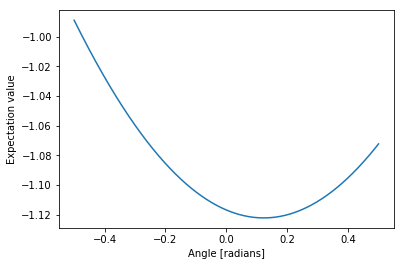

In [82]:
angle_range = np.linspace(-0.5, 0.50, 1000)
data = [vqe_inst.expectation(small_ansatz([angle]), hamiltonian1, None, qvm)
        for angle in angle_range]

import matplotlib.pyplot as plt
plt.xlabel('Angle [radians]')
plt.ylabel('Expectation value')
plt.plot(angle_range, data)
plt.show()

In [83]:
initial_angle=[0.01]
result = vqe_inst.vqe_run(small_ansatz, hamiltonian1, initial_angle, None, qvm=qvm)
print(result)

                     models will be ineffective
{'x': array([0.12280083]), 'fun': -1.122099732838764}


In [84]:
initial_angle=[0.01]
result = vqe_inst.vqe_run(small_ansatz, hamiltonian3, initial_angle, None, qvm=qvm)
print(result)

                     models will be ineffective
{'x': array([4.83653346e-09]), 'fun': -0.34956289498625737}


In [85]:
from forestopenfermion import exponentiate

pyquil_program = exponentiate(qubit_hamiltonian1)
print(pyquil_program)

X 0
PHASE(0.09706626816762856) 0
X 0
PHASE(0.09706626816762856) 0
RZ(0.342825652895538) 0
RZ(0.34282565289553796) 1
RZ(-0.4468630738162712) 2
RZ(-0.4468630738162712) 3
CNOT 0 1
RZ(0.33737796340722415) 1
CNOT 0 1
CNOT 0 2
RZ(0.24125046966780833) 2
CNOT 0 2
CNOT 0 3
RZ(0.3318557006754068) 3
CNOT 0 3
CNOT 1 2
RZ(0.3318557006754068) 2
CNOT 1 2
CNOT 1 3
RZ(0.24125046966780833) 3
CNOT 1 3
CNOT 2 3
RZ(0.34882575224523177) 3
CNOT 2 3
H 0
H 1
RX(pi/2) 2
RX(pi/2) 3
CNOT 0 1
CNOT 1 2
CNOT 2 3
RZ(-0.09060523100759851) 3
CNOT 2 3
CNOT 1 2
CNOT 0 1
H 0
H 1
RX(-pi/2) 2
RX(-pi/2) 3
H 0
RX(pi/2) 1
RX(pi/2) 2
H 3
CNOT 0 1
CNOT 1 2
CNOT 2 3
RZ(0.09060523100759851) 3
CNOT 2 3
CNOT 1 2
CNOT 0 1
H 0
RX(-pi/2) 1
RX(-pi/2) 2
H 3
RX(pi/2) 0
H 1
H 2
RX(pi/2) 3
CNOT 0 1
CNOT 1 2
CNOT 2 3
RZ(0.09060523100759851) 3
CNOT 2 3
CNOT 1 2
CNOT 0 1
RX(-pi/2) 0
H 1
H 2
RX(-pi/2) 3
RX(pi/2) 0
RX(pi/2) 1
H 2
H 3
CNOT 0 1
CNOT 1 2
CNOT 2 3
RZ(-0.09060523100759851) 3
CNOT 2 3
CNOT 1 2
CNOT 0 1
RX(-pi/2) 0
RX(-pi/2) 1
H 2
H 3


In [92]:
from openfermion.utils import trotterize_exp_qubop_to_qasm, uccsd_singlet_paramsize, uccsd_singlet_generator
print(h2_molecule.n_qubits)
print(h2_molecule.n_electrons)
print(uccsd_singlet_paramsize(h2_molecule.n_qubits,h2_molecule.n_electrons))
asu=uccsd_singlet_generator(2.4.2)

SyntaxError: invalid syntax (<ipython-input-92-20d3acfa34ae>, line 5)